In [1]:
import sys
sys.path.append('/cluster/sj1/bb_opt/scripts')

In [2]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collect_stats as cs

%matplotlib inline

In [3]:
import collect_stats as cs


In [199]:
exp_folder = '/cluster/sj1/bb_opt/experiments/ensemble_grad/input_iter_1500_rbf_nmodels_50'
test_filepath = '/cluster/sj1/bb_opt/data/tatsu_pbm/test_files'
num_tfs_to_test = 10
batches = [5, 10, 50, 100]
num_acks = 10

In [198]:
with open(test_filepath, 'r') as f:
    filenames = [k.strip() for k in f.readlines()][:num_tfs_to_test]

In [187]:
filenames = [
    'ARX_L343Q_R1_8mers.txt',
    'BCL6_H676Y_R1_8mers.txt',
    'CRX_E80A_R1_8mers.txt',
    'EGR2_D383Y_R1_8mers.txt',
    'ESX1_K193R_R1_8mers.txt',
    'FOXC1_F112S_R1_8mers.txt',
    'GFI1B_A204T_R1_8mers.txt',
    'GFI1_L400F_R1_8mers.txt',
    'HESX1_E149K_R1_8mers.txt',
    'HOXC4_N178S_R1_8mers.txt',
    'HOXD13_I322L_R1_8mers.txt',
    'ISX_R83Q_R1_8mers.txt',
    'KLF11_R402Q_R1_8mers.txt',
    'KLF1_E325K_R1_8mers.txt',
    'MSX2_P148H_R1_8mers.txt',
    'NKX2-5_K183E_R1_8mers.txt',
    'NR1H4_C144R_R1_8mers.txt',
    'NR2E3_G56R_R1_8mers.txt',
    'OVOL2_D228E_R1_8mers.txt',
    'PAX3_G48R_R1_8mers.txt',
    'PAX4_R183C_R1_8mers.txt',
    'PAX6_A79E_R1_8mers.txt',
    'PAX7_P112L_R1_8mers.txt',
    'PBX4_R215Q_R1_8mers.txt',
    'PHOX2B_Q143R_R1_8mers.txt',
    'PITX2_L100Q_R1_8mers.txt',
    'POU3F4_A237G_R1_8mers.txt',
    'POU4F3_K277R_R1_8mers.txt',
    'POU6F2_E639K_R1_8mers.txt',
    'PROP1_R112Q_R1_8mers.txt',
    'SIX6_H141N_R1_8mers.txt',
    'SNAI2_D119E_R1_8mers.txt',
    'VAX2_L139M_R1_8mers.txt',
    'VENTX_E101K_R1_8mers.txt',
    'VSX1_G160D_R1_8mers.txt',
    'WT1_F392L_R1_8mers.txt',
    'ZNF200_H322Y_R1_8mers.txt',
    'ZNF655_E327G_R1_8mers.txt',
]

In [154]:
arrs = {
    #'o_pdts_0.0_' : [None, '50_0.0'],
    #'o_pdts_init_points_200_0.0_': [None, '200_0.0'],
    #'o_pdts_condense_condense_100_diversity_0.0_' : [None, '100_0.0_cond'],
    #'o_pdts_condense_condense_200_diversity_0.0_': [None, '200_0.0_cond'],
    #'o_pdts_init_points_200_g0.0_' : [None, 'ack_100_g0.0'],
    #'o_pdts_init_points_200_g10.0_' : [None, 'ack_100_g10.0'],
    'o_pdts_ack_size_5_' : [None, 'pdts'],
    'o_pdts_ack_size_50_' : [None, 'pdts'],
    'o_pdts_condense_locations_cp_0.0_1.0_' : [None, 'cond'],
    }
to_read = arrs.keys()

In [184]:
arrs['o_pdts_condense_locations_ntest'] = [None, 'cond2']


In [196]:
arrs['o_pdts_maxin_g10.0_'] = [None, 'pdts_maxin']
arrs['o_pdts_condense_values_maxin_g10.0_'] = [None, 'cond_maxin']


In [207]:
arrs['o_pdts_maxin_gdef_'] = [None, 'pdts_maxin_range']

In [197]:
to_read = ['o_pdts_maxin_g10.0_', 'o_pdts_condense_values_maxin_g10.0_']


In [208]:
to_read = ['o_pdts_maxin_gdef_']

In [209]:
for experiment in to_read:
    print('reading', experiment)
    arrs[experiment][0] = cs.get_data(exp_folder, experiment, batches, num_acks, num_samples=10)

reading o_pdts_maxin_gdef_
reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading sample 6
reading sample 7
reading sample 8
reading sample 9
reading sample 10


In [210]:
ack_iter = 9
for batch_size in [10]:
    print("BATCH SIZE", batch_size)
    for filename in filenames:
        print(filename)
        for experiment in arrs:
            if len(arrs[experiment][0]) == 0:
                continue
            idx_frac = None
            num_used = 0
            val_nll = 0
            for stats in arrs[experiment][0]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                num_used += 1
                val_nll += stats[filename][batch_size][0]['logging'][5].min().item()
                if idx_frac is None:
                    idx_frac = stats[filename][batch_size][ack_iter]['idx_frac']
                else:
                    idx_frac = idx_frac + stats[filename][batch_size][ack_iter]['idx_frac']
            if num_used > 0:
                idx_frac = idx_frac/num_used
                idx_frac = idx_frac.numpy()
                print(arrs[experiment][1] + ":", " ".join(("{:6.6f}".format(k) for k in idx_frac)), ";", "{:6.2f}".format(val_nll/num_used), "val_nll ;", str(num_used), "samples")

BATCH SIZE 10
HOXC4_R158L_R1_8mers.txt
pdts_maxin: 0.038110 0.029015 0.019611 0.012297 ;  -1.00 val_nll ; 10 samples
cond_maxin: 0.035671 0.022871 0.015993 0.010488 ;  -0.89 val_nll ; 10 samples
pdts_maxin_range: 0.037195 0.027068 0.018851 0.012084 ;  -1.15 val_nll ; 10 samples
GFI1_REF_R1_8mers.txt
pdts_maxin: 0.006098 0.018066 0.017878 0.011734 ;  -0.76 val_nll ; 10 samples
cond_maxin: 0.006402 0.015450 0.015901 0.010290 ;  -0.83 val_nll ; 10 samples
pdts_maxin_range: 0.006098 0.017153 0.017969 0.011476 ;  -0.94 val_nll ; 10 samples
CRX_REF_R1_8mers.txt
pdts_maxin: 0.003659 0.008637 0.010672 0.009378 ;  -0.74 val_nll ; 10 samples
cond_maxin: 0.005183 0.007908 0.008817 0.007798 ;  -0.84 val_nll ; 10 samples
HOXD13_REF_R1_8mers.txt
pdts_maxin: 0.049695 0.030414 0.020736 0.012874 ;  -0.86 val_nll ; 10 samples
cond_maxin: 0.038110 0.024635 0.016844 0.010883 ;  -0.94 val_nll ; 10 samples
HOXC4_R158L_R2_8mers.txt
pdts_maxin: 0.034756 0.024513 0.018060 0.011689 ;  -0.76 val_nll ; 10 samples

In [ ]:
ack_iter = 1
for filename in filenames:
    print(filename)
    for batch_size in batches:
        for experiment in arrs:
            best_value = 0
            num_used = 0
            for stats in arrs[experiment][0]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                num_used += 1
                best_value += stats[filename][batch_size][ack_iter]['ack_labels'].max().item()
            if num_used > 0:
                best_value = best_value/num_used
                print(arrs[experiment][1] + ":", best_value, ";", str(num_used), "samples")

GFI1_REF_R1_8mers.txt


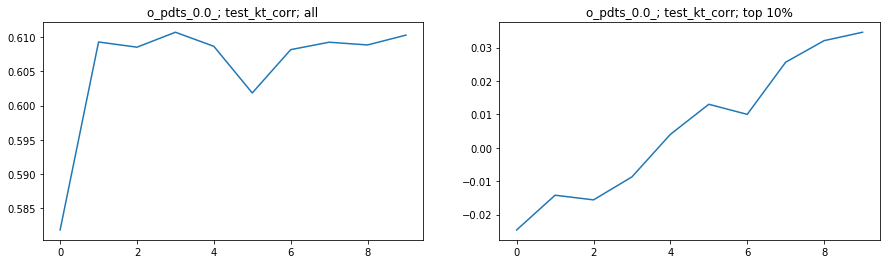

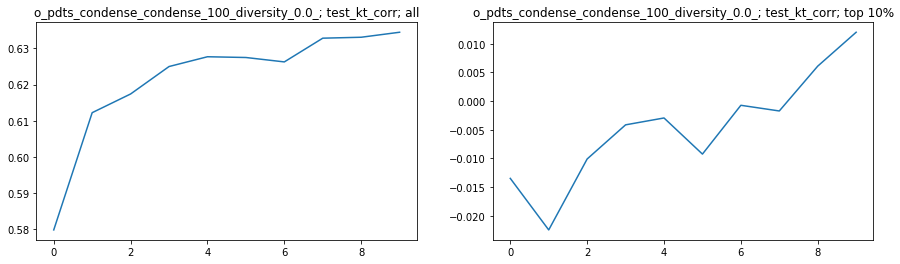

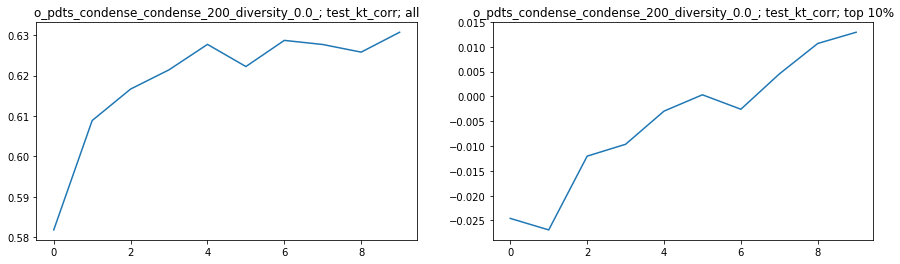

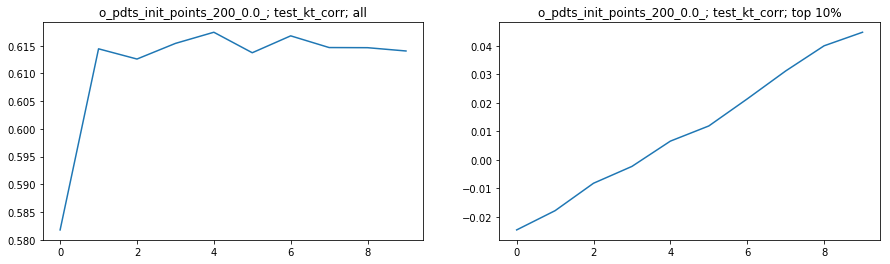

In [36]:
test_properties = [
    'test_log_prob',
    'test_mse',
    'test_kt_corr',
    'test_std_list',
    'test_mse_std_corr'
]

avg = True

for prop in test_properties[2:3]:
    for filename in filenames[0:1]:
        print(filename)
        for batch_size in batches:
            for experiment in arrs:
                plt.figure(figsize=(15, 4))
                plt.subplot(121)
                prop_list = np.array([0.]*num_acks)
                num_used = 0
                for stats in arrs[experiment][0]:
                    if filename not in stats:
                        continue
                    if batch_size not in stats[filename]:
                        continue
                    if len(stats[filename][batch_size]) < num_acks:
                        continue
                    num_used += 1
                    if avg:
                        prop_list += np.array([stats[filename][batch_size][i][prop][0].item() for i in range(num_acks)])
                    else:
                        prop_list = [stats[filename][batch_size][i][prop][0].item() for i in range(num_acks)]
                    if not avg:
                        plt.plot(prop_list)
                if avg:
                    plt.plot(prop_list/num_used)
                plt.title(arrs[experiment][1] + "; " + prop + "; all")
                plt.subplot(122)
                prop_list = np.array([0.]*num_acks)
                num_used = 0
                for stats in arrs[experiment][0]:
                    if filename not in stats:
                        continue
                    if batch_size not in stats[filename]:
                        continue
                    if len(stats[filename][batch_size]) < num_acks:
                        continue
                    num_used += 1
                    if avg:
                        prop_list += np.array([stats[filename][batch_size][i][prop][1].item() for i in range(num_acks)])
                    else:
                        prop_list = [stats[filename][batch_size][i][prop][1].item() for i in range(num_acks)]
                    if not avg:
                        plt.plot(prop_list)
                if avg:
                    plt.plot(prop_list/num_used)
                plt.title(arrs[experiment][1] + "; " + prop + "; top 10%")

In [ ]:
ack_iter = 0
for filename in filenames[2:3]:
    print(filename)
    for batch_size in batches:
        for experiment in arrs:
            plt.figure(figsize=(15, 4))
            for stats in arrs[experiment][0]:
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                prop_list = stats[filename][batch_size][ack_iter]['logging'][-1].numpy()
                plt.plot(prop_list)
                plt.title(arrs[experiment][1] + "; " + str(ack_iter))

In [ ]:
ack_iter = 0
for filename in filenames[2:3]:
    print(filename)
    for batch_size in batches:
        for experiment in arrs:
            plt.figure(figsize=(15, 4))
            for stats in arrs[experiment][0]:
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                prop_list = stats[filename][batch_size][ack_iter]['logging'][5].numpy()
                plt.plot(prop_list)
                plt.title(arrs[experiment][1] + "; " + str(ack_iter))

In [34]:
test_properties = [
    'test_log_prob',
    'test_mse',
    'test_kt_corr',
    'test_std_list',
    'test_mse_std_corr'
]

ack_iter = 9
for filename in filenames:
    print(filename)
    for batch_size in batches:
        for experiment in arrs:
            m = 0
            num_used = 0
            for stats in arrs[experiment][0]:
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                num_used += 1
                m += stats[filename][batch_size][ack_iter]['test_kt_corr'][1].item()
            if num_used > 0:
                print(arrs[experiment][1], ":", m/num_used, ";", num_used, "samples")

GFI1_REF_R1_8mers.txt
o_pdts_0.0_ : 0.034580884873867034 ; 5 samples
o_pdts_condense_condense_100_diversity_0.0_ : 0.012016234686598182 ; 3 samples
o_pdts_condense_condense_200_diversity_0.0_ : 0.01294197179377079 ; 5 samples
o_pdts_init_points_200_0.0_ : 0.044835000112652776 ; 5 samples
HOXC4_R158L_R1_8mers.txt
o_pdts_0.0_ : 0.3554770827293396 ; 5 samples
o_pdts_condense_condense_100_diversity_0.0_ : 0.3074738184611003 ; 3 samples
o_pdts_condense_condense_200_diversity_0.0_ : 0.2700572073459625 ; 5 samples
CRX_REF_R1_8mers.txt
o_pdts_0.0_ : 0.1383776158094406 ; 5 samples
o_pdts_condense_condense_100_diversity_0.0_ : 0.021261356305330992 ; 3 samples
o_pdts_condense_condense_200_diversity_0.0_ : 0.04947322309017181 ; 5 samples
HOXD13_REF_R1_8mers.txt
o_pdts_0.0_ : 0.3566613018512726 ; 5 samples
o_pdts_condense_condense_100_diversity_0.0_ : 0.29000171025594074 ; 3 samples
o_pdts_condense_condense_200_diversity_0.0_ : 0.26433618664741515 ; 5 samples
HOXC4_R158L_R2_8mers.txt
o_pdts_0.0_ : 

In [60]:
num_labels = 32897

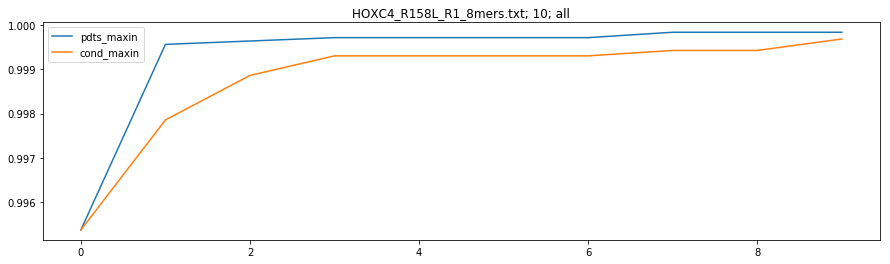

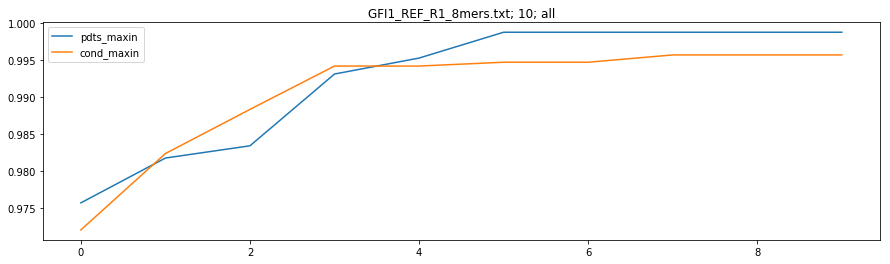

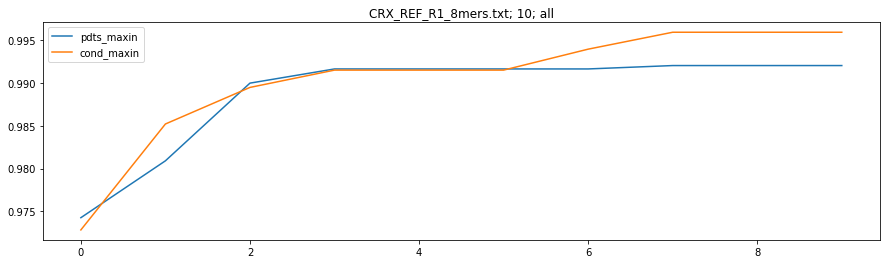

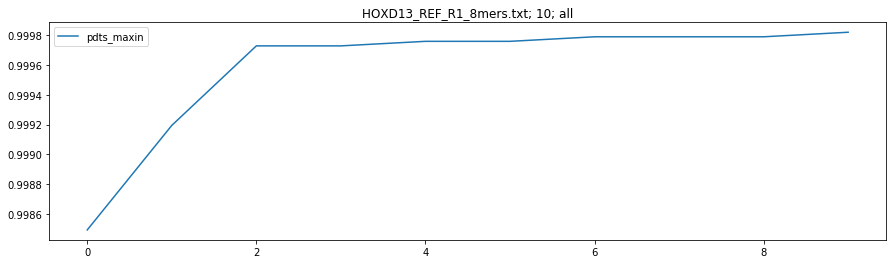

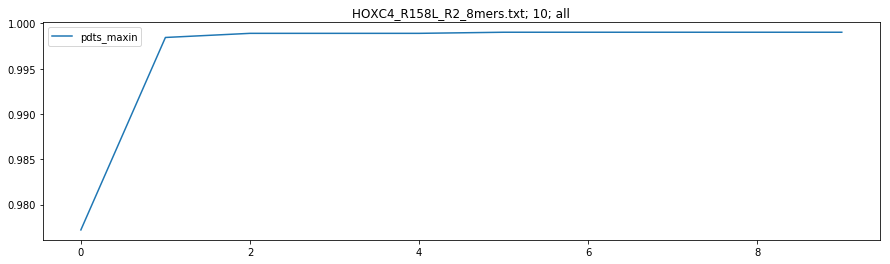

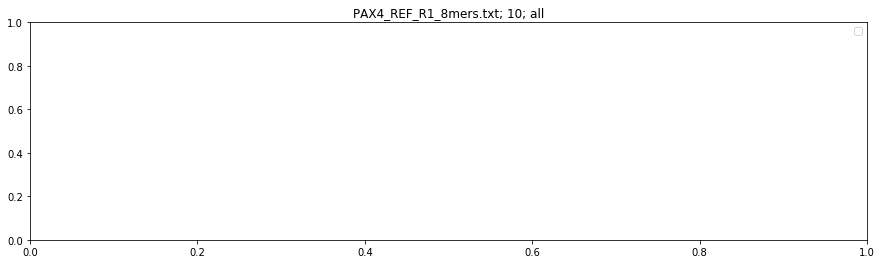

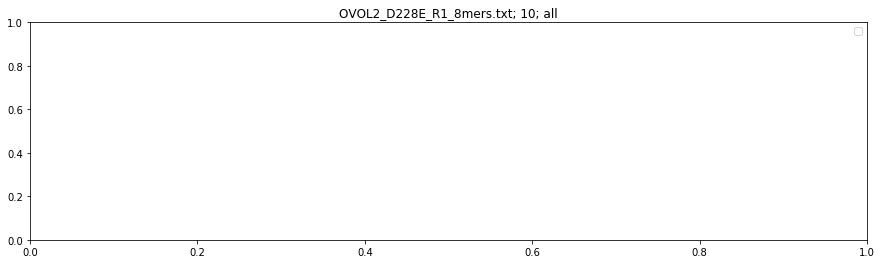

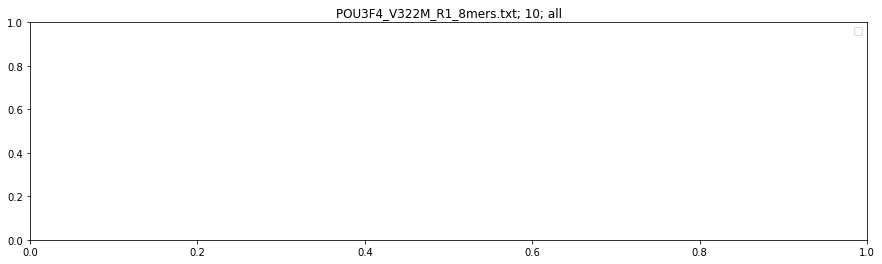

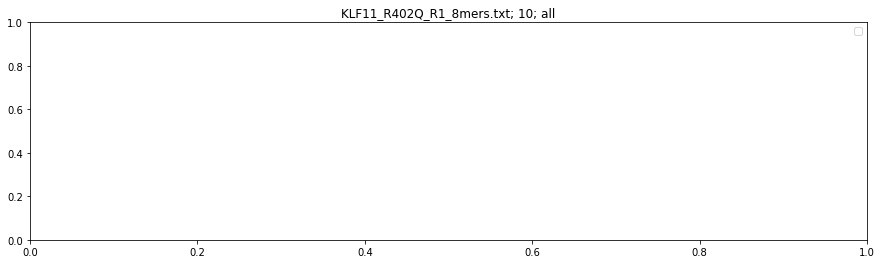

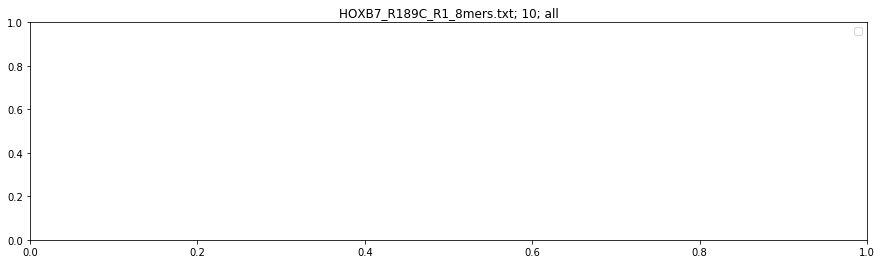

In [204]:
avg = True

for batch_size in [10]:
    for filename in filenames[0:10]:
        if avg:
            plt.figure(figsize=(15, 4))
            legend = []
        for experiment in arrs:
            if not avg:
                plt.figure(figsize=(15, 4))
            prop_list = []
            num_used = 0
            for stats in arrs[experiment][0]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                if len(stats[filename][batch_size]) < num_acks:
                    continue
                num_used += 1
                if avg:
                    prop_list += [np.array([(num_labels-stats[filename][batch_size][ack_iter]['ack_labels'].min())/num_labels for ack_iter in range(num_acks)])]
                else:
                    prop_list = [(num_labels-stats[filename][batch_size][ack_iter]['ack_labels'].min())/num_labels for ack_iter in range(num_acks)]
                if not avg:
                    plt.plot(prop_list)
            if avg and num_used > 0:
                prop_list = np.stack(prop_list, axis=0)
                plt.plot(np.median(prop_list, axis=0))
                legend += [arrs[experiment][1]]
            elif not avg:
                plt.title(arrs[experiment][1] + "; " + str(batch_size) + "; all")
        if avg:
            plt.legend(legend)
            plt.title(filename + "; " + str(batch_size) + "; all")

HOXC4_R158L_R1_8mers.txt


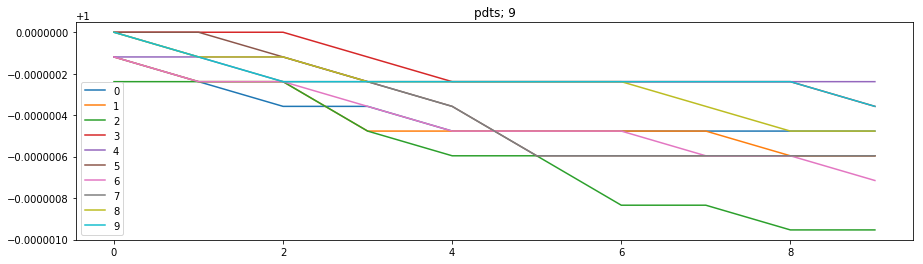

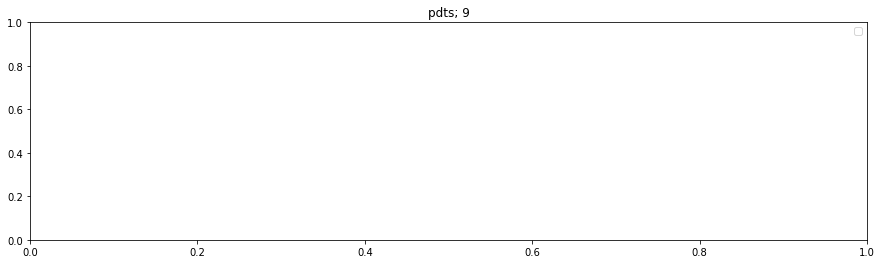

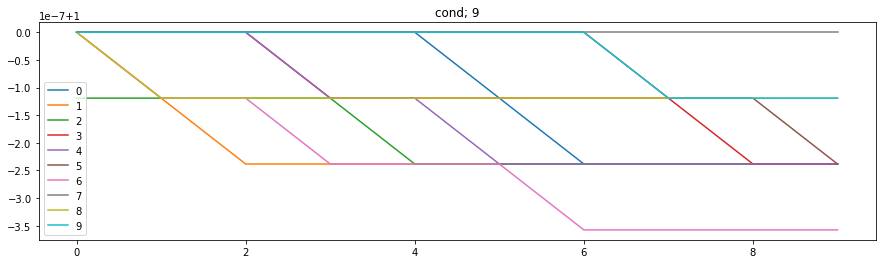

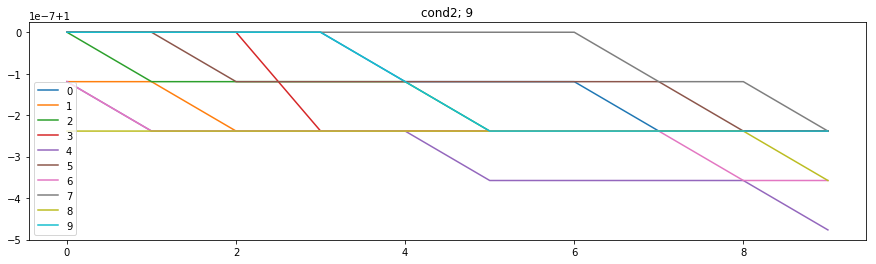

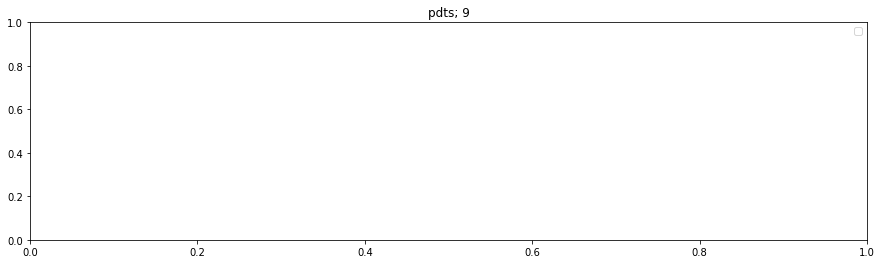

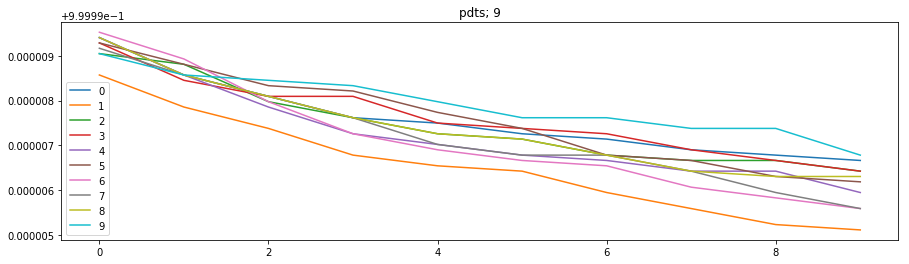

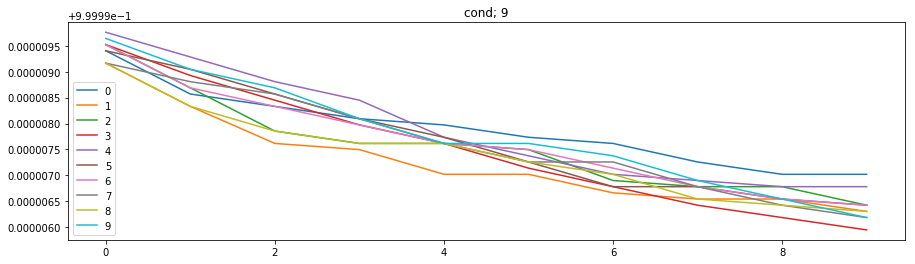

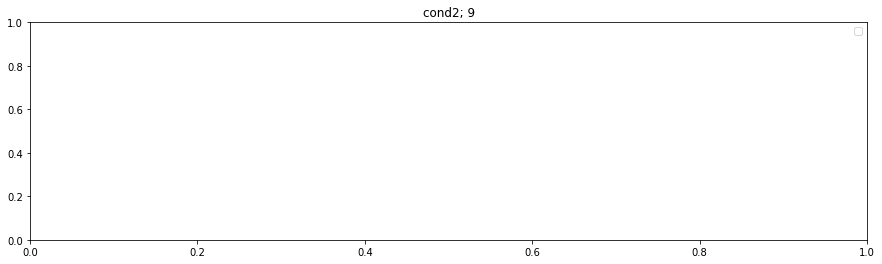

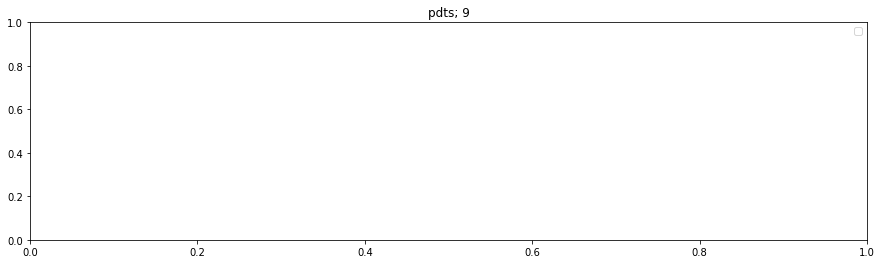

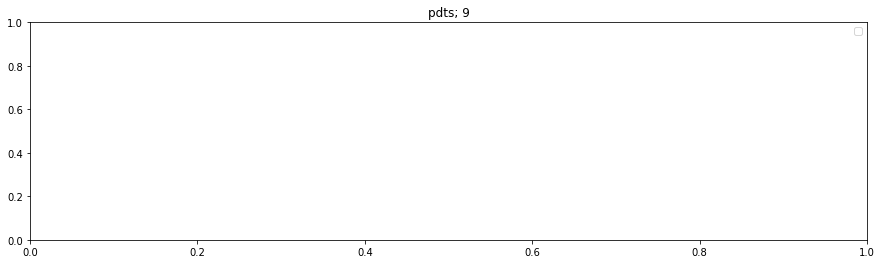

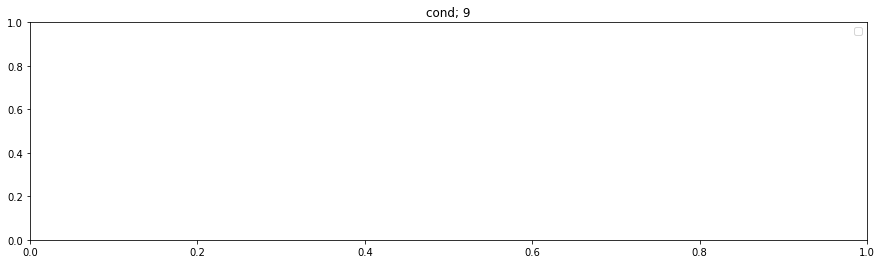

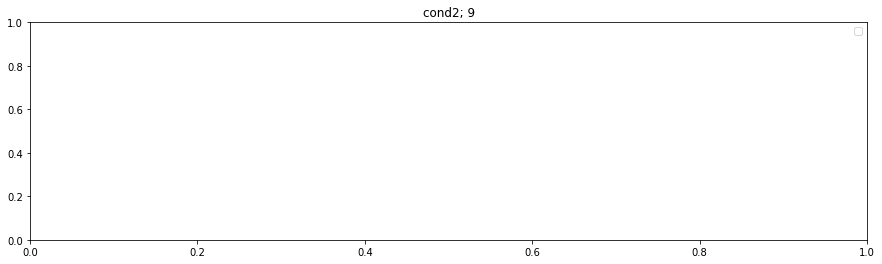

In [195]:
for filename in filenames[0:1]:
    print(filename)
    for batch_size in batches:
        for experiment in arrs:
            plt.figure(figsize=(15, 4))
            legend = []
            for stats_iter in range(len(arrs[experiment][0])):
                stats = arrs[experiment][0][stats_iter]
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                #prop_list = [(num_labels-stats[filename][batch_size][ack_iter]['ack_labels'].min())/num_labels for ack_iter in range(num_acks)]
                prop_list = [(num_labels-stats[filename][batch_size][ack_iter]['idx_frac'][0])/num_labels for ack_iter in range(num_acks)]
                plt.plot(prop_list)
                legend += [str(stats_iter)]
            plt.legend(legend)
            plt.title(arrs[experiment][1] + "; " + str(ack_iter))